### Loan Prediction Dataset:        
#### Shubham Paliwal

In [1]:
import os
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [8]:
#Setting options to display all rows and columns

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.width=None

In [9]:
os.chdir("C:\\Users\\Student\\Desktop\\Project-1_Banking&Analytics\\DataSet_Python\\AV_Loan_Prediction_Dream_housing_Finance_Dataset")
os.getcwd()
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [10]:
Train_original = df_train.copy()
Test_orignal = df_test.copy()

In [11]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

##### Variable	Description
##### Loan_ID  - 	Unique Loan ID
##### Gender  -	Male/ Female
##### Married	- Applicant married (Y/N)
##### Dependents	- Number of dependents
##### Education	- Applicant Education (Graduate/Under Graduate)
##### Self_Employed	- Self employed (Y/N)
##### ApplicantIncome	- Applicant income
##### CoapplicantIncome	- Coapplicant income
##### LoanAmount	- Loan amount in thousands
##### Loan_Amount_Term	- Term of loan in months
##### Credit_History	- Credit history meets guidelines
##### Property_Area- 	Urban/ Semi Urban/ Rural
##### Loan_Status	- Loan approved (Y/N)

In [13]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
print("Dimensions of the train dataset is (Row,columns)",df_train.shape, \
      "and test dataset is", df_test.shape)

Dimensions of the train dataset is (Row,columns) (614, 13) and test dataset is (367, 12)


In [15]:
df_train['Loan_Status'].value_counts() 

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
df_train['Loan_Status'].value_counts() / df_train['Loan_Status'].count().sum() *100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

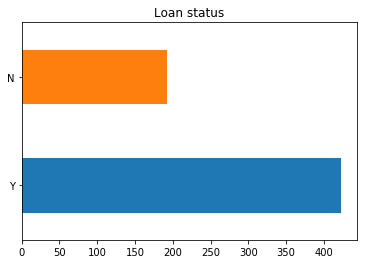

In [17]:
df_train['Loan_Status'].value_counts().plot.barh(title='Loan status')

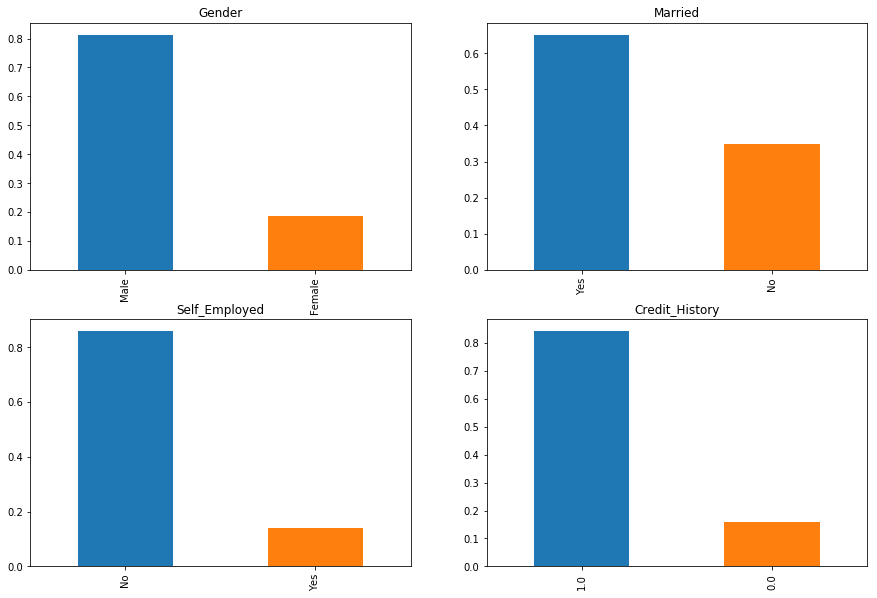

In [18]:
plt.figure(1)
plt.subplot(221)
df_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,10), title= 'Gender') 
plt.subplot(222)
df_train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
df_train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224)
df_train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

##### It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.

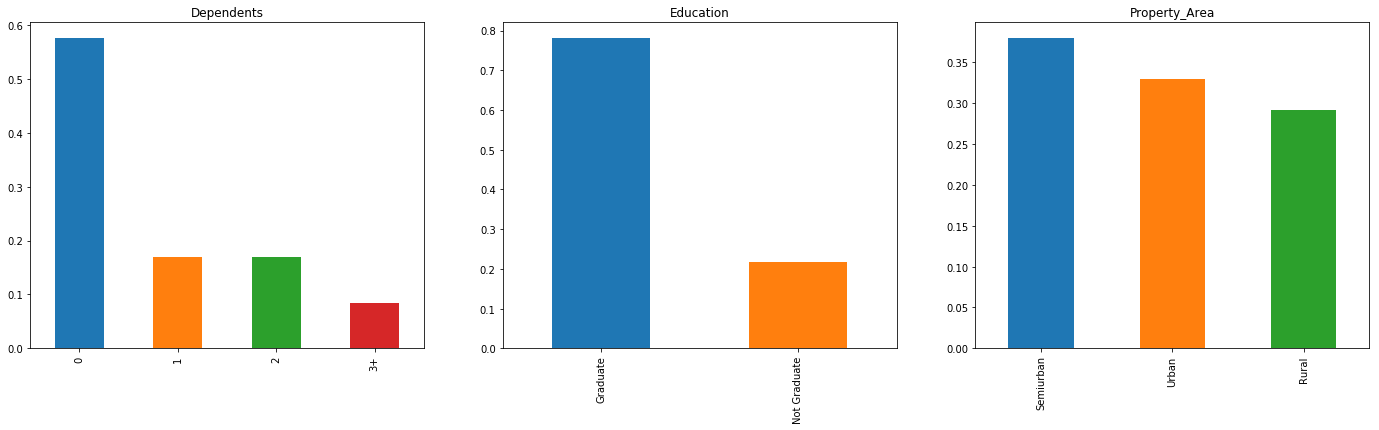

In [19]:
plt.figure(1) 
plt.subplot(131) 
df_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
df_train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
df_train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

#### Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.

C:\Users\Student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


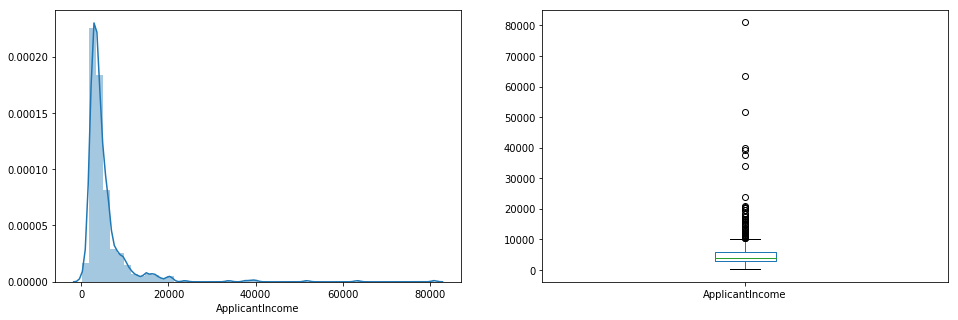

In [20]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df_train['ApplicantIncome']); 
plt.subplot(122) 
df_train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.
#### The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

AttributeError: 'AxesSubplot' object has no attribute 'plt'

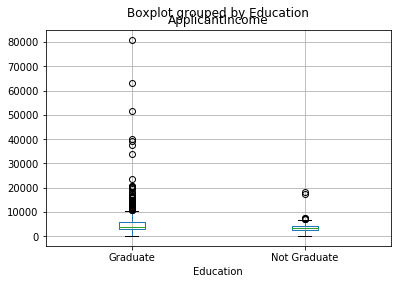

In [21]:
df_train.boxplot(column='ApplicantIncome', by = 'Education').plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.
### Lets look at the coapplicant income distribution

C:\Users\Student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


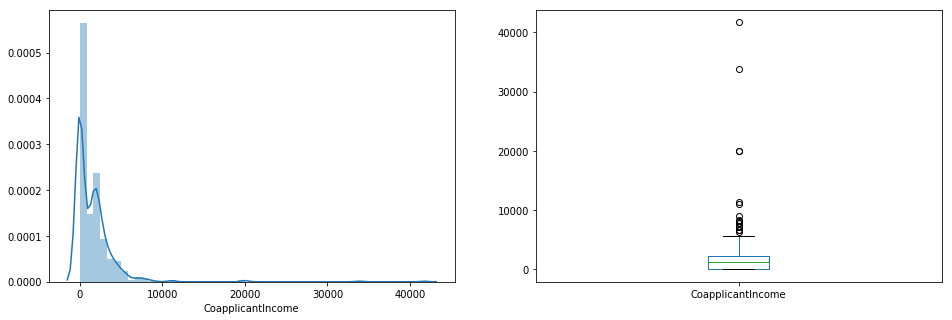

In [22]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df_train['CoapplicantIncome']); 
plt.subplot(122) 
df_train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed

C:\Users\Student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


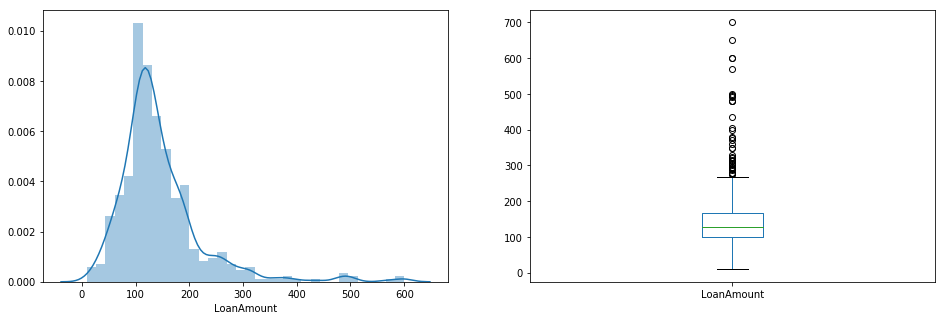

In [23]:
plt.figure(1) 
plt.subplot(121) 
df=df_train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
df_train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections

In [24]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Some of the assumed hypothesis:
##### 1.Applicants with high income should have more chances of loan approval.
##### 2. Applicants who have repaid their previous debts should have higher chances of loan approval.
##### 3. Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
##### 4. Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

### Bivariate Analysis: 
Categorical Independent Variable vs Target Variable

In [25]:
Gender=pd.crosstab(df_train['Gender'],df_train['Loan_Status']) 
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


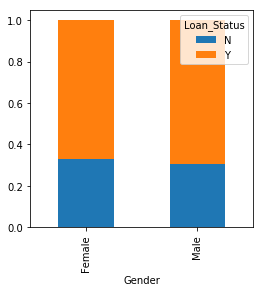

In [26]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.
### Analyse all the remaining categorical variable.

In [27]:
Married=pd.crosstab(df_train['Married'],df_train['Loan_Status']) 
Dependents=pd.crosstab(df_train['Dependents'],df_train['Loan_Status']) 
Education=pd.crosstab(df_train['Education'],df_train['Loan_Status']) 
Self_Employed=pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status']) 
print(Married)
print(Dependents)
print(Education)
print(Self_Employed)

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


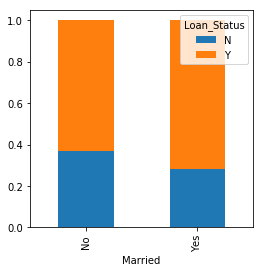

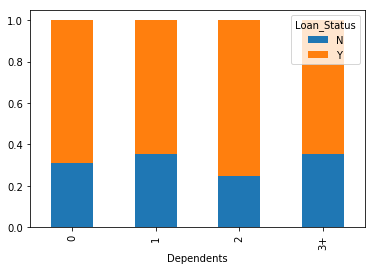

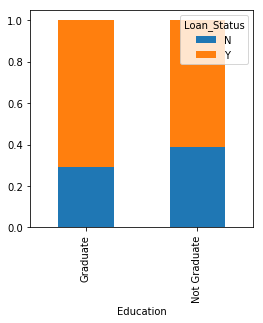

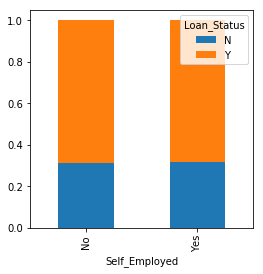

In [28]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

##### Proportion of married applicants is higher for the approved loans.
##### Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
##### There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

### Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

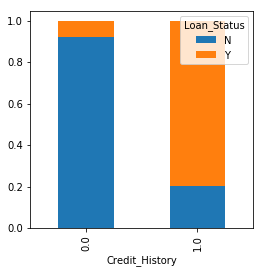

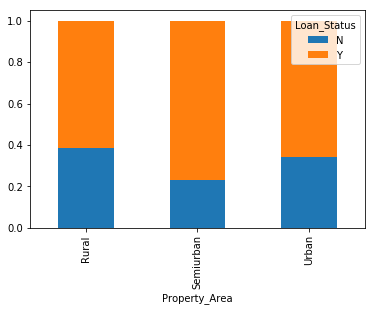

In [29]:
Credit_History=pd.crosstab(df_train['Credit_History'],df_train['Loan_Status']) 
Property_Area=pd.crosstab(df_train['Property_Area'],df_train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

##### It seems people with credit history as 1 are more likely to get their loans approved.
##### Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

### Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

In [30]:
df_train.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

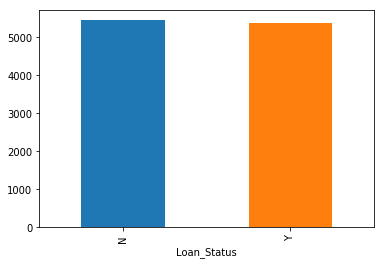

In [31]:
import numpy as np
import matplotlib.pyplot as plt

df_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [32]:
abc = df_train.groupby('Loan_Status')['ApplicantIncome'].mean()

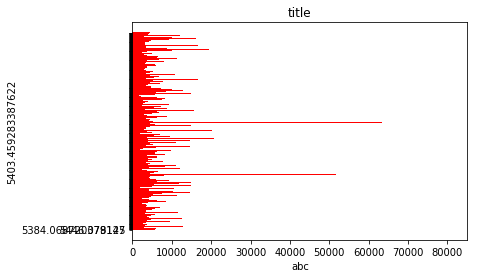

In [33]:
fig, ax = plt.subplots()    
width = 1.75 # the width of the bars 
ind = np.arange(len(df_train['ApplicantIncome']))  # the x locations for the groups
ax.barh(ind, df_train['ApplicantIncome'], width, color="red")
ax.set_yticks(ind+width/df_train['ApplicantIncome'].sum())
ax.set_yticklabels(abc, minor=False)
plt.title('title')
plt.xlabel('abc')
plt.ylabel(df_train['ApplicantIncome'].mean()) 
plt.show()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [34]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
df_train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

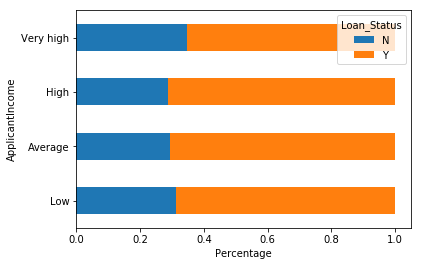

In [35]:
Income_bin=pd.crosstab(df_train['Income_bin'],df_train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True) 
plt.xlabel('Percentage') 
P = plt.ylabel('ApplicantIncome')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

### We will analyze the coapplicant income and loan amount variable in similar manner.

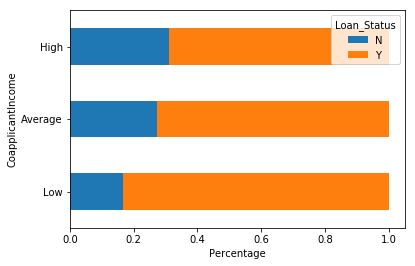

In [36]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
df_train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(df_train['Coapplicant_Income_bin'],df_train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True) 
plt.xlabel('Percentage') 
P = plt.ylabel('CoapplicantIncome')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

#### Now lets combined both the variable and see the impact of this on loan status.

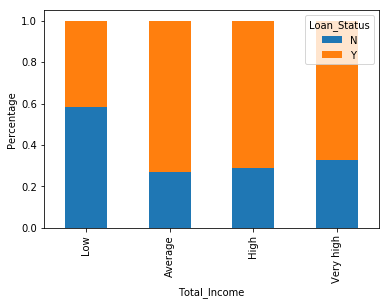

In [37]:
df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
df_train['Total_Income_bin']=pd.cut(df_train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(df_train['Total_Income_bin'],df_train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')


We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

#### Let's visualize the loan amount variable

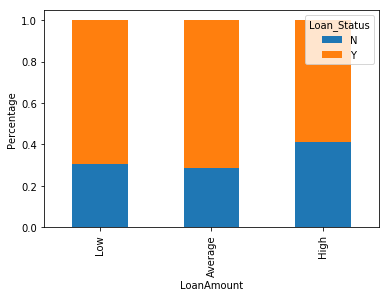

In [38]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
df_train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(df_train['LoanAmount_bin'],df_train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [39]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [40]:
df_train=df_train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
df_train['Dependents'].replace('3+', 3,inplace=True) 
df_test['Dependents'].replace('3+', 3,inplace=True) 
df_train['Loan_Status'].replace('N', 0,inplace=True) 
df_train['Loan_Status'].replace('Y', 1,inplace=True)

In [41]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation.

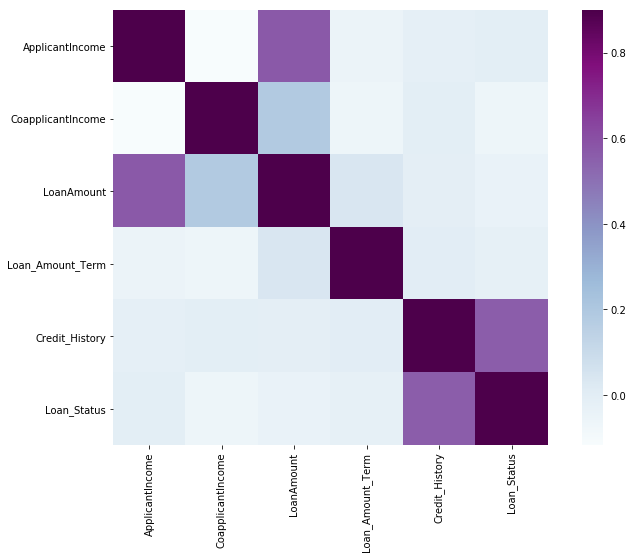

In [42]:
Corr_matrix = df_train.corr()
ax = plt.subplots(figsize=(12, 8)) 
sns.heatmap(Corr_matrix, vmax=.9, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

### Missing Value treatment:

In [43]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Treatment of missing value one by one.
#### For numerical variables: imputation using mean or median
#### For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [44]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True) 
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True) 
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True) 
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

In [45]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [47]:
df_train['Loan_Amount_Term'].head(20)

0     360.0
1     360.0
2     360.0
3     360.0
4     360.0
5     360.0
6     360.0
7     360.0
8     360.0
9     360.0
10    360.0
11    360.0
12    360.0
13    360.0
14    120.0
15    360.0
16    240.0
17    360.0
18    360.0
19      NaN
Name: Loan_Amount_Term, dtype: float64

In Loan_Amount_Term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [48]:
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)

In [49]:
df_train['Loan_Amount_Term'].isnull().sum()

0

As Loan_Amount is a numerical variable, we can use mean or median to impute the missing values. We will use 'Median' to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [50]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)

In [51]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Let's fill all the missing values in the test dataset as well with the same approach.

In [53]:
df_test['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True) 
df_test['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True) 
df_test['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True) 
df_test['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True) 
df_test['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True) 
df_test['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)

In [54]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. There are many ways to handle this skewness such as Normalization - Min Max & Z-score, Log transformation etc.One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

##### Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

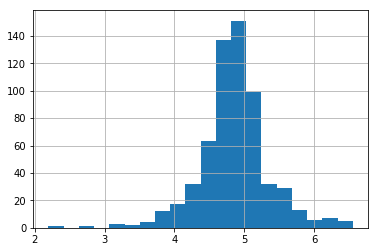

In [55]:
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
df_train['LoanAmount_log'].hist(bins=20) 
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

### Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

In [56]:
## Loan ID variable do not affect the loan status so we eliminate this.
df_train=df_train.drop('Loan_ID',axis=1) 
df_test=df_test.drop('Loan_ID',axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python.
##### Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset

In [57]:
X = df_train.drop('Loan_Status',1) 
y = df_train.Loan_Status

Now we will make dummy variables for the categorical variables

In [58]:
X = df_train.drop('Loan_Status',1) 
y = df_train.Loan_Status

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

#### We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [60]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let’s predict the Loan_Status for validation set and calculate its accuracy.


In [61]:
Pred_cv = model.predict(x_cv)

Let us calculate how accurate our predictions are by calculating the accuracy.

In [62]:
accuracy_score(y_cv,Pred_cv)*100

78.91891891891892

So now it shows our prediction is almost 77% accurate i.e. we have idenified 77% of loan status correctly.

In [63]:
# Let’s make predictions for the test dataset.

pred_test = model.predict(df_test)

In [64]:
# Lets import the submission file which we have to submit on the solution checker.
submission=pd.read_csv("sample_submission_S7jWYrJ.csv")

We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.


In [65]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=Test_orignal['Loan_ID']

In [66]:
## we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

#### Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

In [67]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

From this submission we got the 78 or almost 80% accuracy on the leadershiip board.

In [68]:
pd.DataFrame(df_train).to_csv('POwerBI.csv')

In [69]:
from sklearn.model_selection import StratifiedKFold
# Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset.

In [70]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('\n{} of kfold {}'.format(i,kf.n_splits))
xtr,xvl = X.loc[train_index],X.loc[test_index]
ytr,yvl = y[train_index],y[test_index]
model = LogisticRegression(random_state=1)
model.fit(xtr, ytr)
pred_test = model.predict(xvl)
score = accuracy_score(yvl,pred_test)
print('accuracy_score',score)
i+=1 
pred_test = model.predict(df_test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.8278688524590164


C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


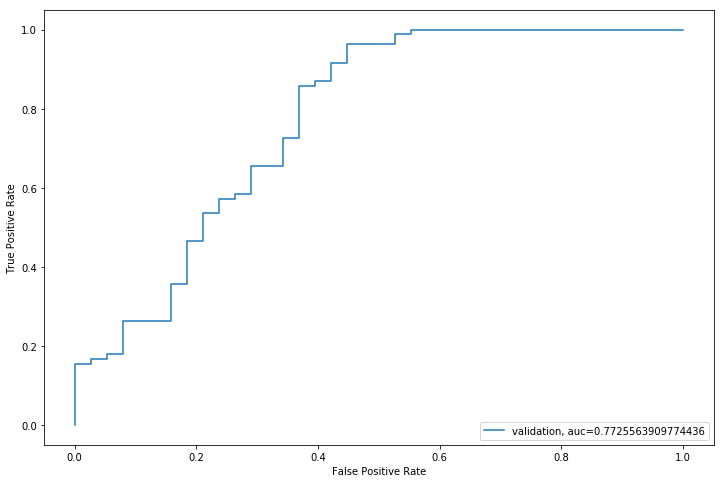

In [71]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

#### We got an auc value of 0.77

In [72]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=Test_orignal['Loan_ID']

In [73]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [74]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

### Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

##### Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
##### EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
##### Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [75]:
# Now we are creating the new column Total Inocme includes (Applicant income and coapplicant income)
df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome'] 
df_test['Total_Income']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']

C:\Users\Student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


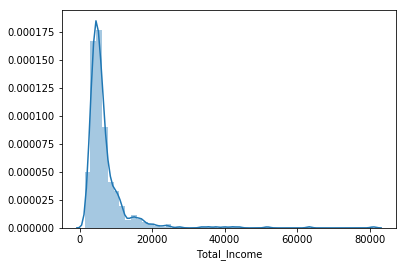

In [76]:
# Now check the distribution:
sns.distplot(df_train['Total_Income'])

#### At present this distribution is rightly skewed. so for normal distribution let's take the log transformation.

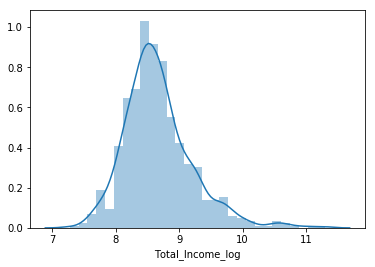

In [77]:
df_train['Total_Income_log'] = np.log(df_train['Total_Income'])
sns.distplot(df_train['Total_Income_log']);
df_test['Total_Income_log'] = np.log(df_test['Total_Income'])


Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now

In [78]:
df_train['EMI']=df_train['LoanAmount']/df_train['Loan_Amount_Term'] 
df_test['EMI']=df_test['LoanAmount']/df_test['Loan_Amount_Term']

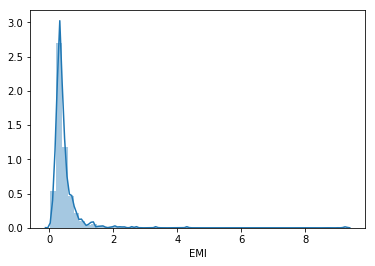

In [79]:
## Let’s check the distribution of EMI variable.
sns.distplot(df_train['EMI'])

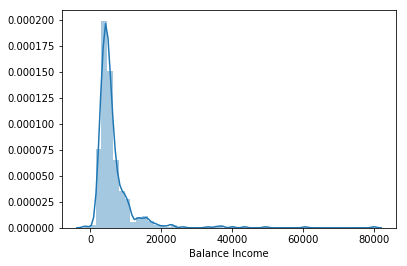

In [80]:
## Let us create Balance Income feature now and check its distribution.

df_train['Balance Income']=df_train['Total_Income']-(df_train['EMI']*1000) # Multiply with 1000 to make the units equal 
df_test['Balance Income']=df_test['Total_Income']-(df_test['EMI']*1000)
sns.distplot(df_train['Balance Income'])

#### Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.



In [81]:
df_train=df_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
df_test=df_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [82]:
df_train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

##### After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost

In [83]:
### Let’s prepare the data for feeding into the models.

X = df_train.drop('Loan_Status',1) 
y = df_train.Loan_Status                # Save target variable in separate dataset


### Logistic Regression

In [84]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         

model = LogisticRegression(random_state=1)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)
i+=1 
pred_test = model.predict(df_test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.8278688524590164


C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### The mean validation accuracy for this model is 0.812

In [85]:
submission['Loan_Status']=pred_test # filling Loan_Status with predictions 
submission['Loan_ID']=Test_orignal['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

#### From this submission we got an accuracy of 0.7847 on the leaderboard. So we can infer feature engineering has not improved the model. Let us look at some other algorithms.

In [86]:
import numpy as np
import keras as ks

In [87]:
from keras.models import Sequential
from keras.layers import Dense 

In [88]:
model1 =Sequential()

#### Decision Tree
Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [89]:
from sklearn import tree
## Let’s fit the decision tree model with 5 folds of cross validation.

In [102]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

In [106]:
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = tree.DecisionTreeClassifier(random_state=1)  
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(df_test)


3 of kfold 5

3 of kfold 5

3 of kfold 5

3 of kfold 5

3 of kfold 5
accuracy_score 0.7049180327868853


The mean validation accuracy for this model is 0.69

In [100]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

### We got an accuracy of 0.63
which is much lesser than the accuracy from logistic regression model. So let’s build another model, i.e. Random Forest, a tree based ensemble algorithm and try to improve our model by improving the accuracy.

### RandomForest
#### RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
Final prediction can be a function of all the predictions made by the individual learners.
In case of regression problem, the final prediction can be mean of all the predictions.

In [110]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = RandomForestClassifier(random_state=1, max_depth=10)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 

pred_test = model.predict(df_test)


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.8114754098360656


C:\Users\Student\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### The mean validation accuracy for this model is 0.7614

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

### After trying and testing 3 different algorithms, the best accuracy on the public leaderboard is achieved by Logistic Regression (81.21), followed by Random Forest (76.14)

## ______________________________________Thank You_____________________